In [1]:
from lib.utils import aggregate_pred_dataframe, generate_mean_ensemble_metrics_auto
import pandas as pd
import os

def read_models(key):
    valids_by_folds = [[] for _ in range(5)]
    tests_by_folds = [[] for _ in range(5)]
    for fold in range(5):
        directory = f'result_cv/{key}/fold_{fold}/intermediate'
        files = [f for f in os.listdir(directory) if f.startswith('iter_')]
        files.sort(key=lambda x: int(x.split('_')[1]))
        test_files = [f for f in files if f.endswith('test.csv')]
        valid_files = [f for f in files if f.endswith('valid.csv')]
        print(test_files)
        for file in test_files:
            fold_pred = pd.read_csv(f'{directory}/{file}')
            tests_by_folds[fold].append(fold_pred)
            
        for file in valid_files:
            fold_pred = pd.read_csv(f'{directory}/{file}')
            valids_by_folds[fold].append(fold_pred)
    return tests_by_folds, valids_by_folds

In [2]:
tf, vf = read_models('esm-33-gearnet-ensemble')

['iter_0_test.csv', 'iter_1_test.csv', 'iter_2_test.csv', 'iter_3_test.csv', 'iter_4_test.csv', 'iter_5_test.csv', 'iter_6_test.csv', 'iter_7_test.csv', 'iter_8_test.csv', 'iter_9_test.csv', 'iter_10_test.csv', 'iter_11_test.csv', 'iter_12_test.csv', 'iter_13_test.csv', 'iter_14_test.csv', 'iter_15_test.csv', 'iter_16_test.csv', 'iter_17_test.csv', 'iter_18_test.csv', 'iter_19_test.csv', 'iter_20_test.csv', 'iter_21_test.csv', 'iter_22_test.csv', 'iter_23_test.csv', 'iter_24_test.csv', 'iter_25_test.csv', 'iter_26_test.csv', 'iter_27_test.csv', 'iter_28_test.csv', 'iter_29_test.csv', 'iter_30_test.csv', 'iter_31_test.csv', 'iter_32_test.csv', 'iter_33_test.csv', 'iter_34_test.csv', 'iter_35_test.csv', 'iter_36_test.csv', 'iter_37_test.csv', 'iter_38_test.csv', 'iter_39_test.csv', 'iter_40_test.csv', 'iter_41_test.csv', 'iter_42_test.csv', 'iter_43_test.csv', 'iter_44_test.csv', 'iter_45_test.csv', 'iter_46_test.csv', 'iter_47_test.csv', 'iter_48_test.csv', 'iter_49_test.csv']
['iter_0_

In [3]:
def aggregate_pred_prefixes(valids_by_folds, tests_by_folds):
    mx = len(valids_by_folds[0])
    for i in range(1, len(valids_by_folds)):
        assert len(valids_by_folds[i]) == mx
        assert len(tests_by_folds[i]) == mx
        
    df = pd.DataFrame()
    for i in range(1, mx+1):
        print(f'iter {i}')
        for fold in range(5):
            df_valid = aggregate_pred_dataframe(dfs=valids_by_folds[fold][:i], apply_sig=True)
            df_test = aggregate_pred_dataframe(dfs=tests_by_folds[fold][:i], apply_sig=True)
            
            me_metric = generate_mean_ensemble_metrics_auto(df_valid=df_valid, df_test=df_test, start=0.1, end=0.6, step=0.01)
            df = pd.concat([df, pd.DataFrame([{**me_metric, 'fold': fold, 'n_models': i}])])
    return df

def read_and_aggregate(key):
    tf, vf = read_models(key)
    return aggregate_pred_prefixes(valids_by_folds=vf, tests_by_folds=tf)


In [4]:

df_esm_33_gearnet_ensemble = read_and_aggregate('esm-33-gearnet-ensemble')

['iter_0_test.csv', 'iter_1_test.csv', 'iter_2_test.csv', 'iter_3_test.csv', 'iter_4_test.csv', 'iter_5_test.csv', 'iter_6_test.csv', 'iter_7_test.csv', 'iter_8_test.csv', 'iter_9_test.csv', 'iter_10_test.csv', 'iter_11_test.csv', 'iter_12_test.csv', 'iter_13_test.csv', 'iter_14_test.csv', 'iter_15_test.csv', 'iter_16_test.csv', 'iter_17_test.csv', 'iter_18_test.csv', 'iter_19_test.csv', 'iter_20_test.csv', 'iter_21_test.csv', 'iter_22_test.csv', 'iter_23_test.csv', 'iter_24_test.csv', 'iter_25_test.csv', 'iter_26_test.csv', 'iter_27_test.csv', 'iter_28_test.csv', 'iter_29_test.csv', 'iter_30_test.csv', 'iter_31_test.csv', 'iter_32_test.csv', 'iter_33_test.csv', 'iter_34_test.csv', 'iter_35_test.csv', 'iter_36_test.csv', 'iter_37_test.csv', 'iter_38_test.csv', 'iter_39_test.csv', 'iter_40_test.csv', 'iter_41_test.csv', 'iter_42_test.csv', 'iter_43_test.csv', 'iter_44_test.csv', 'iter_45_test.csv', 'iter_46_test.csv', 'iter_47_test.csv', 'iter_48_test.csv', 'iter_49_test.csv']
['iter_0_

In [5]:
df_esm_33_gearnet_ensemble

,sensitivity,specificity,accuracy,precision,mcc,micro_auroc,valid_mcc,best_threshold,fold,n_models
0,0.6300,0.9874,0.9689,0.7315,0.6627,0.9101,0.6805,0.10,0,1
0,0.6475,0.9879,0.9703,0.7450,0.6791,0.9307,0.6157,0.43,1,1
0,0.6108,0.9900,0.9703,0.7691,0.6704,0.8974,0.6037,0.10,2,1
0,0.5710,0.9917,0.9699,0.7903,0.6570,0.9214,0.6747,0.25,3,1
0,0.6316,0.9886,0.9701,0.7514,0.6735,0.9200,0.6532,0.11,4,1
...,...,...,...,...,...,...,...,...,...,...
0,0.6635,0.9873,0.9705,0.7402,0.6854,0.9432,0.7153,0.15,0,50
0,0.6411,0.9900,0.9719,0.7776,0.6917,0.9461,0.6391,0.31,1,50
0,0.7065,0.9855,0.9711,0.7274,0.7017,0.9497,0.6442,0.10,2,50
0,0.6986,0.9855,0.9707,0.7252,0.6963,0.9489,0.7066,0.12,3,50


<Axes: title={'center': 'Normal Ensemble'}, xlabel='n_models'>

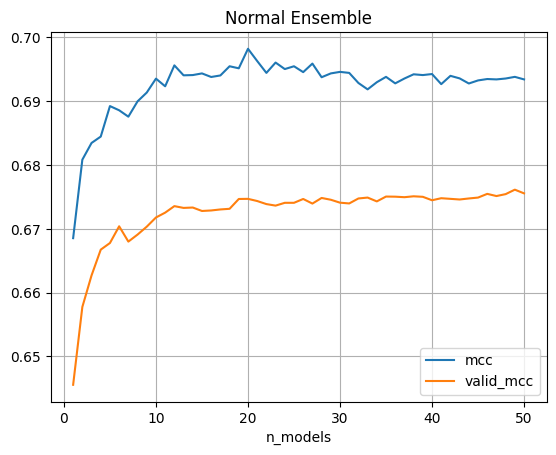

In [6]:
%matplotlib inline
df_esm_33_gearnet_ensemble.groupby('n_models').aggregate('mean').plot(y=['mcc', 'valid_mcc'], grid=True, title='Normal Ensemble')

In [7]:
df_esm_33_resiboost_v2 = read_and_aggregate('esm-33-gearnet-resiboost')

['iter_0_test.csv', 'iter_1_test.csv', 'iter_2_test.csv', 'iter_3_test.csv', 'iter_4_test.csv', 'iter_5_test.csv', 'iter_6_test.csv', 'iter_7_test.csv', 'iter_8_test.csv', 'iter_9_test.csv', 'iter_10_test.csv', 'iter_11_test.csv', 'iter_12_test.csv', 'iter_13_test.csv', 'iter_14_test.csv', 'iter_15_test.csv', 'iter_16_test.csv', 'iter_17_test.csv', 'iter_18_test.csv', 'iter_19_test.csv', 'iter_20_test.csv', 'iter_21_test.csv', 'iter_22_test.csv', 'iter_23_test.csv', 'iter_24_test.csv', 'iter_25_test.csv', 'iter_26_test.csv', 'iter_27_test.csv', 'iter_28_test.csv', 'iter_29_test.csv', 'iter_30_test.csv', 'iter_31_test.csv', 'iter_32_test.csv', 'iter_33_test.csv', 'iter_34_test.csv', 'iter_35_test.csv', 'iter_36_test.csv', 'iter_37_test.csv', 'iter_38_test.csv', 'iter_39_test.csv', 'iter_40_test.csv', 'iter_41_test.csv', 'iter_42_test.csv', 'iter_43_test.csv', 'iter_44_test.csv', 'iter_45_test.csv', 'iter_46_test.csv', 'iter_47_test.csv', 'iter_48_test.csv', 'iter_49_test.csv']
['iter_0_

<Axes: title={'center': 'resiboost'}, xlabel='n_models'>

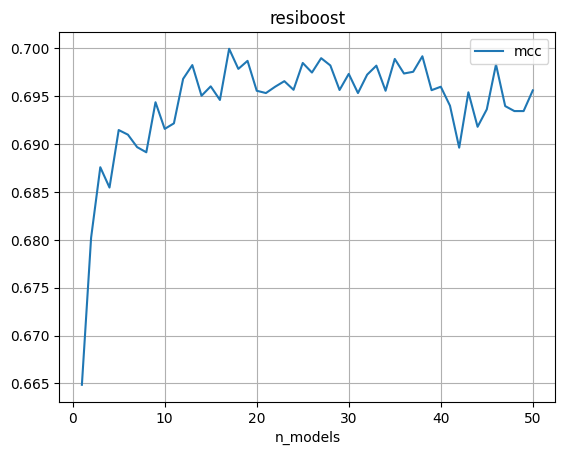

In [8]:
%matplotlib inline
df_esm_33_resiboost_v2.groupby('n_models').aggregate('mean').plot(y='mcc', grid=True, title='resiboost')